In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout, InputLayer,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

x = pd.read_csv('drive/MyDrive/devset.csv',usecols=['id'])
y = pd.read_csv('drive/MyDrive/devset.csv',usecols=['T3.1: Anger','T3.2: Anxiety','T3.3: Craving','T3.4: Emphatic pain','T3.5: Fear','T3.6: Horror','T3.7: Joy','T3.8: Relief','T3.9: Sadness','T3.10:surprise'])
print(x)
print(y)

                                        id
0     bfe3ffeb-f7ef-4099-92a2-bf91979485f0
1     cca53ec1-d907-4801-8a23-dde7ca4f41be
2     b7bc12c0-3210-475a-a85e-54b585ee4d7c
3     a45dc547-4f38-4515-b3ae-b714ea3d4549
4     b9f63b47-8f56-41ca-b7af-8c36a70da197
...                                    ...
2427  4ca5d3c6-5df2-4bc5-83ce-a0ffb86f053f
2428  57790f7a-35b2-40ed-995e-802733a0d72e
2429  39dc8813-559f-4229-aa40-3b3483dd8019
2430  f6920fc6-bd79-4fcd-94c8-55ee6cac3403
2431  def7acf4-b646-4166-aeae-0fb5860d6789

[2432 rows x 1 columns]
      T3.1: Anger  T3.2: Anxiety  T3.3: Craving  T3.4: Emphatic pain  \
0               1              1              0                    0   
1               0              0              0                    0   
2               0              0              1                    0   
3               0              0              0                    1   
4               1              0              0                    1   
...           ...          

In [4]:
labels = y.to_numpy()
print(labels)

[[1 1 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 1 ... 0 1 0]
 ...
 [0 1 0 ... 0 0 1]
 [1 1 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]]


In [5]:
print(x['id'])
filename = []
for i in x['id']:
  filename.append(i)
print(filename)

0       bfe3ffeb-f7ef-4099-92a2-bf91979485f0
1       cca53ec1-d907-4801-8a23-dde7ca4f41be
2       b7bc12c0-3210-475a-a85e-54b585ee4d7c
3       a45dc547-4f38-4515-b3ae-b714ea3d4549
4       b9f63b47-8f56-41ca-b7af-8c36a70da197
                        ...                 
2427    4ca5d3c6-5df2-4bc5-83ce-a0ffb86f053f
2428    57790f7a-35b2-40ed-995e-802733a0d72e
2429    39dc8813-559f-4229-aa40-3b3483dd8019
2430    f6920fc6-bd79-4fcd-94c8-55ee6cac3403
2431    def7acf4-b646-4166-aeae-0fb5860d6789
Name: id, Length: 2432, dtype: object
['bfe3ffeb-f7ef-4099-92a2-bf91979485f0', 'cca53ec1-d907-4801-8a23-dde7ca4f41be', 'b7bc12c0-3210-475a-a85e-54b585ee4d7c', 'a45dc547-4f38-4515-b3ae-b714ea3d4549', 'b9f63b47-8f56-41ca-b7af-8c36a70da197', 'c5a74b3b-dfcb-47ed-afc9-042877a45e1d', '42422a27-af91-4b33-976a-254c1d5e3f0f', '1eac5435-7e67-4be3-9182-5f78094a0fc1', 'be412141-cc96-4c99-87ab-985955d13a3e', 'b61ee208-a7a5-4c4c-81fc-c452dc48734c', '19eaa0ea-c202-4320-a4b8-2d5b6c37997e', 'ee1d53cc-af1b-4dad-b751-3

In [6]:
'''import cv2 as cv
from matplotlib.pyplot import imshow
path = "drive/MyDrive/devset/"

im_size = 64

images = []
m = 0
for f in filename:
  img = cv.imread(path+'/'+f+'.jpg')
  m+=1
  print(m)
  img = cv.resize(img,(im_size,im_size))
  #img = cv.Canny(img,100,200)
  #imshow(img)
  img = preprocess_input(img)
  #imshow(img)
  images.append(img)
images = np.array(images)
images = images/255.0
images.shape'''

'import cv2 as cv\nfrom matplotlib.pyplot import imshow\npath = "drive/MyDrive/devset/"\n\nim_size = 64\n\nimages = []\nm = 0\nfor f in filename:\n  img = cv.imread(path+\'/\'+f+\'.jpg\')\n  m+=1\n  print(m)\n  img = cv.resize(img,(im_size,im_size))\n  #img = cv.Canny(img,100,200)\n  #imshow(img)\n  img = preprocess_input(img)\n  #imshow(img)\n  images.append(img)\nimages = np.array(images)\nimages = images/255.0\nimages.shape'

In [7]:
images = np.load("/content/drive/MyDrive/images_64.npy")
images.shape

(2432, 64, 64, 3)

In [8]:
im_size = 64

In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
#images,Y = shuffle(images,Y,random_state=5)

train_x,test_x,train_y,test_y = train_test_split(images, labels,test_size=0.1, random_state=50)
#sm = SMOTE('minority')
#train_x,train_y = mdo.fit_transform(np.copy(train_x), np.copy(train_y))
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2188, 64, 64, 3)
(2188, 10)
(244, 64, 64, 3)
(244, 10)


In [10]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
vgg = VGG19(input_shape=(im_size,im_size,3), weights='imagenet', include_top=False)
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
#adding output layer.Softmax classifier is used as it is multi-class classification
#prediction = Dense(7, activation='softmax')(x)
x = Dense(3072, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
prediction =Dense(10, activation='sigmoid')(x)

model = Model(inputs=vgg.input, outputs=prediction)
model.summary()
'''model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="Adam",
  metrics=['accuracy']
)'''
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr = 0.001),
  metrics=[keras.metrics.BinaryAccuracy(name = "accuracy")]
)

80150528/80134624 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model
history = model.fit(
  train_x,
  train_y,
  validation_data=(test_x,test_y),
  epochs=10,
  batch_size=32,shuffle=True)

Epoch 1/10
69/69 [==============================] - 14s 42ms/step - loss: 0.5656 - accuracy: 0.7424 - val_loss: 0.5124 - val_accuracy: 0.7537
Epoch 2/10
69/69 [==============================] - 2s 26ms/step - loss: 0.4969 - accuracy: 0.7617 - val_loss: 0.5034 - val_accuracy: 0.7594
Epoch 3/10
69/69 [==============================] - 2s 26ms/step - loss: 0.4848 - accuracy: 0.7676 - val_loss: 0.5162 - val_accuracy: 0.7602
Epoch 4/10
69/69 [==============================] - 2s 26ms/step - loss: 0.4697 - accuracy: 0.7752 - val_loss: 0.5146 - val_accuracy: 0.7586
Epoch 5/10
69/69 [==============================] - 2s 27ms/step - loss: 0.4555 - accuracy: 0.7824 - val_loss: 0.5107 - val_accuracy: 0.7627
Epoch 6/10
69/69 [==============================] - 2s 26ms/step - loss: 0.4383 - accuracy: 0.7894 - val_loss: 0.5216 - val_accuracy: 0.7607
Epoch 7/10
69/69 [==============================] - 2s 26ms/step - loss: 0.4210 - accuracy: 0.8002 - val_loss: 0.5323 - val_accuracy: 0.7508
Epoch 8/10
6

In [12]:
#model.save("/content/drive/MyDrive/VGG19_Task2.h5")

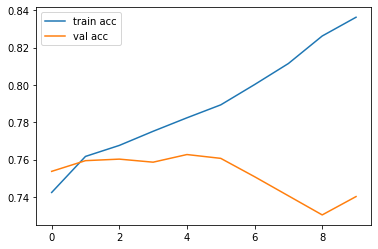

In [13]:
plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()

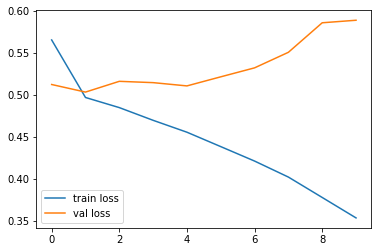

In [14]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [15]:
model.evaluate(test_x,test_y)

8/8 [==============================] - 0s 28ms/step - loss: 0.5891 - accuracy: 0.7402


[0.5891143083572388, 0.7401639819145203]

In [16]:
def fun(e):
  return 1 if e>0.5 else 0

vfun = np.vectorize(fun)

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
predict_x=model.predict(test_x) 
print(vfun(predict_x[20]))
classes_x=vfun(predict_x)
print(test_y[20])
print(classification_report(test_y,classes_x))
print(f1_score(test_y,classes_x,average='weighted'))

[0 1 0 0 1 1 0 0 1 0]
[0 1 0 0 1 1 0 0 0 0]
              precision    recall  f1-score   support

           0       0.25      0.18      0.21        56
           1       0.48      0.33      0.39       103
           2       0.00      0.00      0.00        11
           3       0.50      0.03      0.05        80
           4       0.58      0.57      0.57       124
           5       0.37      0.24      0.29        63
           6       0.44      0.24      0.31        29
           7       0.20      0.03      0.05        32
           8       0.85      0.93      0.89       200
           9       0.12      0.04      0.06        56

   micro avg       0.61      0.43      0.51       754
   macro avg       0.38      0.26      0.28       754
weighted avg       0.52      0.43      0.45       754
 samples avg       0.64      0.47      0.49       754

0.4457375944843871


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


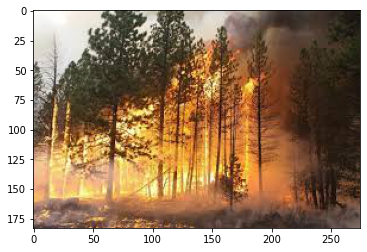

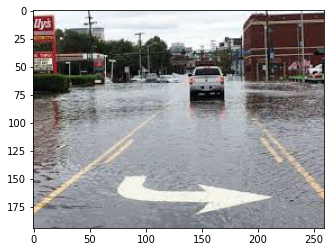

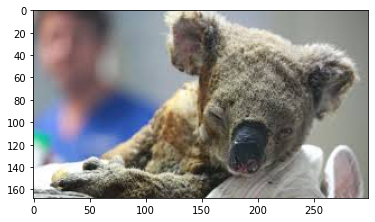

In [19]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from keras.preprocessing import image
import cv2 as cv
images = ['00bf1649-7f48-44ce-b208-a648023bd65a.jpg','28480eff-e6be-4ab2-9343-ed05eb0b60d7.jpg','01af425e-61c8-4e5b-9cb4-bdff3f407037.jpg']
X = []
for img_path in images:
  img = cv.imread(img_path)
  img = cv.resize(img,(im_size,im_size))
  #img = cv.Canny(img,100,200)
  img = preprocess_input(img)
  x = np.array(img)
  x=x/255.0
  x = np.expand_dims(x,axis = 0)
  X.append(x)
  my_image = imread(img_path)
  plt.figure()
  imshow(my_image)

In [21]:
labeling = ['anger','anxiety','craving','emphaticPain','fear','horror','joy','relief','sadness','surprise']
for i in range (3):
  pred = model.predict(X[i])
  pred_l = vfun(pred)
  print(pred_l)
  for i in range(0,9):
    if(pred_l[0][i] == 1):
      print(arr[i],end = " ")
  print()

[[0.28779274 0.39659712 0.0104953  0.2771805  0.6188007  0.57482725
  0.02677616 0.01530536 0.9007444  0.09252808]]
fear
horror
sadness
[[8.2953811e-01 9.6817285e-01 6.6542685e-05 1.7407037e-02 9.1705376e-01
  5.6864798e-01 2.3252734e-03 3.4080807e-03 6.9577044e-01 3.7316158e-01]]
anger
anxiety
fear
horror
sadness
[[5.9278142e-02 1.0723860e-03 1.1126661e-03 2.2613475e-02 1.9249420e-03
  3.2488370e-04 9.9882537e-01 8.9442992e-01 1.8562317e-02 3.5289586e-01]]
joy
relief


In [ ]:
model.save("vgg19_sampled_working.h5")